# Predicción de Cancer de mama


### Objetivo
Usaremos un flujo de trabajo ML para diagnosticar el cáncer como benigno (no se expande al resto del cuerpo) o maligno (se expande al resto del cuerpo). La idea es proporcionar un detección temprana del cancer para evitar su expansión

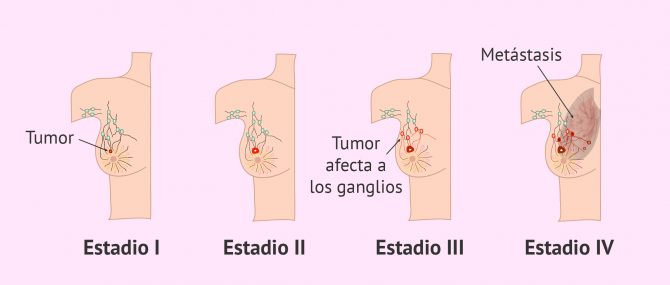

Dataset: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

La idea de la primera clase es aprender a realizar una exploración exhaustiva de los datos. Posteriormente se aprenderá a aplicar técnicas de selección de características. De evaluará el/los modelos aplicando y sin aplicar técnicas de Feature Selection y compararemos resultados.

## Preparar entorno de trabajo

### Crear entorno virtual (Conda/Python env)

Una vez creado activamos el entorno con 'conda activate myentorno' para instalar la librerías necesarias

### Instalamos las librerías necesarias

Para instalar las librerías podemos hacerlo mediante "pip install" o "conda install"

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

## Paso 1: Adquisición de los datos

In [2]:
from sklearn.datasets import load_breast_cancer
breast_cancer = load_breast_cancer()

In [3]:
# Observación de todos los elementos del dataset
display(breast_cancer)

In [4]:
# Elementos del dataset
breast_cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
# print(breast_cancer.DESCR[27:3130])

In [6]:
# Observación de variables target
# print(breast_cancer.data)
# print(breast_cancer.target)
print(breast_cancer.target_names)

['malignant' 'benign']


In [7]:
print(breast_cancer.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [8]:
print(breast_cancer.filename)
print(breast_cancer.data_module)

breast_cancer.csv
sklearn.datasets.data


### Lectura de los datos
Crearemos un dataframe y lo rellenaremos con cada una de las "features" del dataset

In [9]:
# cargamos los datos en un dataframe 
df_features = pd.DataFrame(breast_cancer.data, columns = breast_cancer.feature_names)
# Obtenemos información general del dataset
# df_features.info()

In [10]:
df_features.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Lectura de la variable "target"

In [11]:
# 1 - Benigno
# 0 - Maligno
df_target = pd.DataFrame(breast_cancer.target, columns=['target'])
# df_target.head()

In [12]:
df_target['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

Según la descripción del conjunto de datos, la distribución de la variable objetivo es: 212 - Maligno, 357 - Benigno. Por lo tanto, "benign" y "maglinant" se presentan como 1 y 0, respectivamente.

Para empezar a trabajar concatenamos ambos dataframes: características (Features) y variable objetivo (target)

In [13]:
df = pd.concat([df_features, df_target], axis=1)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## Paso 2: Preprocesamiento de los datos

Comprobamos si los datos necesitan ser pre-procesados. 

Ahora necesitaríamos estandarizar nuestros datos antes de comenzar a trabajar pero ya lo hemos hecho previamente para visualizar los datos correctamente

In [34]:
# df.isna().sum()

¡POR SUERTE! 
Los datos han sido limpiados y pre-procesados previamente por lo que podemos saltarnos este paso

## Paso 3: Preparar los datos

Ahora dividimos nuestros datos usando la función “train_test_split” de Scikit-learn. Queremos darle al modelo tantos datos como sea posible para entrenar. Sin embargo, también queremos asegurarnos de tener suficientes datos para poder evaluar el modelo. En general, a medida que aumenta el número de filas en el conjunto de datos, más datos podemos proporcionar al conjunto de entrenamiento.

Por ejemplo, si tuviéramos millones de filas, podríamos tener un 90% de entrenamiento y un  10% de prueba dividida. Sin embargo, nuestro conjunto de datos tiene solo 569 filas, lo que no es un conjunto de datos muy grande para entrenar o probar. Entonces, para ser justos tanto con el entrenamiento como con las pruebas, dividiremos los datos en 50% de entrenamiento y 50% de prueba. Establecemos "stratify = y" para asegurarnos de que tanto el conjunto de train como los conjuntos de test tienen la misma proporción de 0 y 1 que el conjunto de datos original.

In [35]:
from sklearn.model_selection import train_test_split
X = df_features
y = df_target['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, 
                                                    random_state = 2020, stratify=y)

In [36]:
print(X_train.shape)
print(y.shape)

(569, 30)
(569,)


#### Escalar los datos 
https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02


## Paso 4: Selección del modelo

Estamos viendo un caso de uso de clasificación binaria [0:maligno, 1:benigno]. Por lo tanto, debemos de elegir algún algoritmo de clasificación para implementar nuestro modelo. 

Lo primero y más importante para elegir con éxito el algoritmo que más se adapta a nuestras necesidades es:

- Determinar qué queremos conseguir
- Ver qué datos disponemos

Una vez que se tienen claros estos dos puntos y conociendo los algoritmos de machine learning existentes, podremos escoger el que mejor se adapte a nuestras necesidades. Sin embargo, suponiendo que no hemos trabajado nunca en un caso de uso similar probaremos una batería de algoritmos ML y los compararemos para ver cuál de ellos no ofrece mejores resultados en este caso.

Algunos de los algoritmos ML más comunes para clasificación:

- Decision Tree/Random Forest
- K Nearest Neighbor
- Naive Bayes
- Support Vector Machine
- Logistic Regression




### Random Forest Classification

In [37]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

## Paso 5:  Evaluación del modelo

In [38]:
from sklearn.metrics import confusion_matrix, classification_report
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n")
print("Classification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[ 63   4]
 [  3 118]]


Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.95        67
           1       0.97      0.98      0.97       121

    accuracy                           0.96       188
   macro avg       0.96      0.96      0.96       188
weighted avg       0.96      0.96      0.96       188



accuracy, recall, f1-score es aproximadamente un  95%. 

Se puede observar en la matriz de confusión que el modelo solo ha fallado en 9 predicciones

## PCA (Principal Component Analysis)

Otra forma de mejorar nuestro modelo es usando la reducción de dimensión, podemos aproximar el conjunto de datos original con menos variables, mientras reducimos el poder computacional para ejecutar nuestro modelo. Usando PCA, podemos estudiar la razón de varianza explicada acumulativa de estas características para comprender qué características explican la mayor varianza en los datos.

Instalamos la función PCA y establecemos el número de componentes (características) que queremos considerar. Lo configuraremos en "30" para ver la variación explicada de todos los componentes generados, antes de decidir dónde realizar el corte. Luego, "ajustamos" nuestros datos a la función PCA

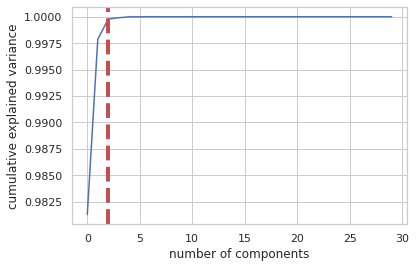

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.981297,9.812975e-01
1,0.997864,1.656650e-02
2,0.999786,1.921710e-03
3,0.999910,1.244997e-04
4,0.999989,7.869867e-05
5,0.999995,5.911149e-06
6,0.999999,3.773446e-06
7,0.999999,8.183376e-07
8,1.000000,3.667756e-07
9,1.000000,1.528938e-07


In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

pca_test = PCA(n_components=30)
pca_test.fit(X_train)

sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=2, ymin=0, ymax=1)
display(plt.show())

evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(10))

Observamos que con tan solo dos componentes podemos obtener resultados prometedores